In [1]:
import matplotlib.pyplot as plt
import numpy as np

# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')

## Stochastic Gradient Descent with $L_2$ Regularization 
$\hat{y} = xw + b$

$ \theta = \begin{bmatrix} 
          w  \\
          b 
     \end{bmatrix} $

$X = \begin{bmatrix} 
          x_1 & 1\\ 
          x_2 & 1\\
          \cdots & \cdots \\
          x_n & 1 
     \end{bmatrix} $

$ \hat{y} = x \theta $  

$J(\theta) = \frac{1}{2n} \sum ( \hat{y}_{test} - y_{test} )^2 + \alpha w^T w$ 

Note that, in regularization we only penalize the weights and not the bias. 

$J(\theta) = \frac{1}{2n} \sum ( x_i \theta - y_{test} )^2 + \alpha w^T w$

$\nabla_{\theta} J(\theta) = -\frac{1}{n} X^T.[X \theta - Y_{test} ]$

$\theta = \theta - \epsilon \nabla_{\theta} J(\theta)$

$\theta = \theta + \frac{\epsilon}{n} X^T.[X \theta - Y_{test}]$

In [35]:
# Linear Regression using Stochastic Gradient Descent
def batchloader(X, Y, batchsize = 20):
    n = Y.shape[0]
    idx = np.random.choice(np.arange(n),size=batchsize,replace=False)
    X_batch = X[idx,:]
    Y_batch = Y[idx,:]
    return X_batch, Y_batch

def computeRegularizedCost(X, Y, theta, w, alpha=0.2):
    fMSE = 0
    n = Y.shape[0]
    fMSE = (1/(2*n))*( np.dot( (np.dot(X,theta) - Y).transpose(), np.dot(X,theta) - Y)) + alpha*np.dot(w.T, w) 
    return fMSE 

def computeMSE(X,Y,theta):
    fMSE = 0
    n = Y.shape[0]
    fMSE = (1/(2*n))*( np.dot( (np.dot(X,theta) - Y).transpose(), np.dot(X,theta) - Y))
    return fMSE

def SGD(X, Y, learning_rate=0.001, epochs=100, bs = 0.2, alpha = 0.2):
    
    n, m = X.shape
    n, p = Y.shape
    
    w = np.random.randn(m,p)
    b = np.random.randn(p,p)
    
    batchsize = round(bs*n)
    
    # preprocessing Data
    X = np.append(X, np.ones((n,p)), axis=1)
    
    n,m_new = X.shape

    COST = np.zeros(epochs)
    THETAs = np.zeros((m_new, p, epochs))
    
    theta = np.append(w, b, axis=0)
    
    for i in range(epochs):
        THETAs[:,:,i] = theta
    
        # Get Batch 
        X_batch, Y_batch = batchloader(X, Y, batchsize) 
        Y_pred = np.dot(X_batch,theta)
        
        # perform gradient descent
        gradJ = (1/n)*( np.dot(X_batch.T, (Y_pred - Y_batch) )) 
        theta = theta - learning_rate * gradJ - 2*alpha*np.append(w,np.zeros((p,p)),axis=0)
         
        w = theta[:m,:p]    

        # get cost
        COST[i] = computeMSE(X_batch, Y_batch, theta)
    
    return theta, THETAs, COST

(4000, 2304)
MSE:  [[158.05390374]]
MSE:  [[166.06759737]]
MSE:  [[160.0179001]]
MSE:  [[181.64689359]]
MSE:  [[165.73292493]]
MSE:  [[146.11632759]]
MSE:  [[155.46065789]]
MSE:  [[148.70797971]]
MSE:  [[157.90045034]]
MSE:  [[186.33738836]]
MSE:  [[150.30187998]]
MSE:  [[141.06990789]]
MSE:  [[147.75681509]]
MSE:  [[137.28548135]]
MSE:  [[140.10962182]]
MSE:  [[131.86394993]]
MSE:  [[140.53155902]]
MSE:  [[149.45500889]]
MSE:  [[147.36550626]]
MSE:  [[169.49100411]]
MSE:  [[142.47548014]]
MSE:  [[140.4692004]]
MSE:  [[152.01547524]]
MSE:  [[145.19476806]]
MSE:  [[136.86547369]]
MSE:  [[137.35267628]]
MSE:  [[132.24225804]]
MSE:  [[135.675269]]
MSE:  [[146.15409647]]
MSE:  [[147.04520661]]
MSE:  [[126.44929956]]
MSE:  [[132.28726917]]
MSE:  [[144.99671981]]
MSE:  [[132.71999632]]
MSE:  [[145.80591868]]
MSE:  [[173.30008189]]
MSE:  [[147.36677296]]
MSE:  [[127.59603044]]
MSE:  [[133.3747801]]
MSE:  [[143.23618887]]
MSE:  [[136.23192157]]
MSE:  [[133.81643856]]
MSE:  [[135.38459242]]
MSE

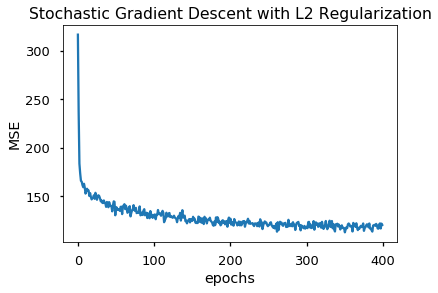

MSE on test data:  122.81342187585251


In [36]:
# Load data
X = np.load("age_regression_Xtr.npy")
n = X.shape[0]
X = X.reshape((n,-1))
Y = np.load("age_regression_ytr.npy")
Y = Y.reshape(-1,1)

# Get Validation Set
idx = np.arange(n)
validation_set_size = round(0.2*n) # 20%
idx_v = np.random.choice(idx,size=validation_set_size,replace=False)
Xv = X[idx_v,:]
Yv = Y[idx_v,:]

# preprocessing on validation set 
n_v = Xv.shape[0]
Xv = np.append(Xv, np.ones((n_v,1)), axis=1)

# Get Training Data Set
idx_tr = np.setxor1d(idx, idx_v)
X_tr = X[idx_tr,:]
Y_tr = Y[idx_tr,:]
print(X_tr.shape)
# batchsize = round(0.2*X_tr.shape[0]) # 20% of training set

# Tune Hyper parameter
LR = [0.001, 0.005, 0.01, 0.05]
EPOCHS = [50, 100, 200, 400]
BATCHSIZE = [0.1, 0.2, 0.3, 0.5]
ALPHA = [0.001, 0.002, 0.005, 0.01]

cost = 10000
for lr_ in LR:
    for epochs_ in EPOCHS:
        for bs_ in BATCHSIZE:
            for alpha_ in ALPHA:
                theta, THETAs, COST = SGD(X_tr, Y_tr, learning_rate=lr_, epochs=epochs_, bs=bs_, alpha=alpha_)
                MSE = computeMSE(Xv, Yv, theta)
                print("MSE: ", MSE)
                
                if(MSE<cost):
                    lr = lr_
                    epochs = epochs_
                    bs = bs_
                    alpha = alpha_
                    cost=MSE

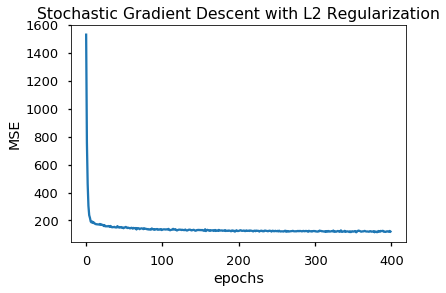

MSE on test data:  126.04883422842661
Tuned Hyperparameters: 
learning rate:  0.005 , Epochs:  400 , mini-batchsize (in %):  50.0 , alpha:  0.002


In [41]:
# Training on tuned hyperparameters
theta, THETAs, COST = SGD(X, Y, learning_rate=lr, epochs=epochs, bs=bs, alpha=alpha)

plt.plot(COST)
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Stochastic Gradient Descent with L2 Regularization')
plt.show()

# Testing 
X_te = np.load("age_regression_Xte.npy")
n = X_te.shape[0]
X_te = X_te.reshape((n,-1))

# preprocessing Data
X_te = np.append(X_te, np.ones((n,1)), axis=1)

yte = np.load("age_regression_yte.npy")
yte = yte.reshape(-1,1)
MSE_test = computeMSE(X_te, yte, theta)
print('MSE on test data: ', MSE_test[0,0])
print('Tuned Hyperparameters: ')
print('learning rate: ', lr, ', Epochs: ', epochs, ', mini-batchsize (in %): ', bs*100, ', alpha: ', alpha)